In [1]:
import os
from PIL import Image

# === Step 1: Define image paths ===
image_paths = [
    "Picture2.jpg",
    "Screenshot 2025-04-29 083517.png",
    "Screenshot 2025-04-29 083151-i.png"
]

# === Step 2: Define target size (width, height) ===
target_size = (440, 329)

# === Step 3: Create output directory ===
output_dir = "resized_images"
os.makedirs(output_dir, exist_ok=True)

# === Step 4: Resize and save images ===
for path in image_paths:
    try:
        img = Image.open(path).resize(target_size)
        # Clean filename
        filename = os.path.basename(path).replace(" ", "_")
        output_path = os.path.join(output_dir, f"resized_{filename}")
        img.save(output_path)
        print(f"Saved: {output_path}")
    except Exception as e:
        print(f"Failed to process {path}: {e}")


Failed to process Picture2.jpg: [Errno 2] No such file or directory: 'C:\\Users\\mlesan4\\Downloads\\New folder\\yeki\\resized_images\\svd 1 - Copy\\Picture2.jpg'
Failed to process Screenshot 2025-04-29 083517.png: [Errno 2] No such file or directory: 'C:\\Users\\mlesan4\\Downloads\\New folder\\yeki\\resized_images\\svd 1 - Copy\\Screenshot 2025-04-29 083517.png'
Failed to process Screenshot 2025-04-29 083151-i.png: [Errno 2] No such file or directory: 'C:\\Users\\mlesan4\\Downloads\\New folder\\yeki\\resized_images\\svd 1 - Copy\\Screenshot 2025-04-29 083151-i.png'


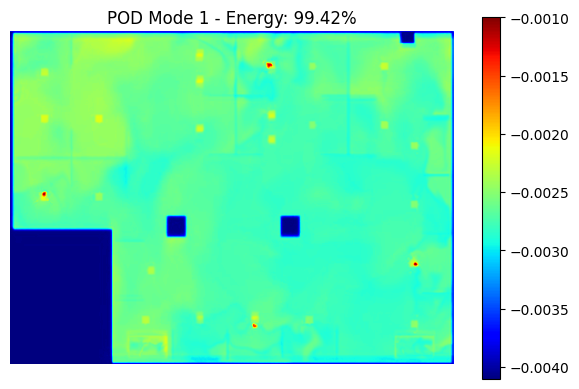

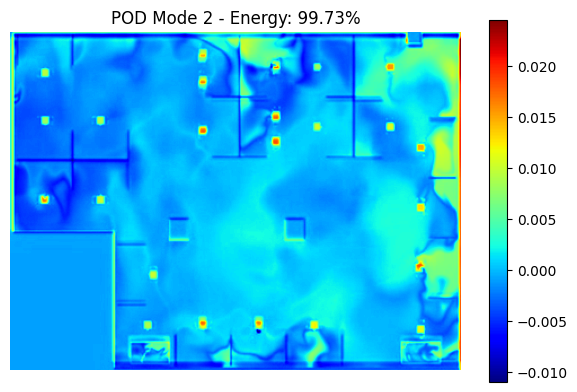

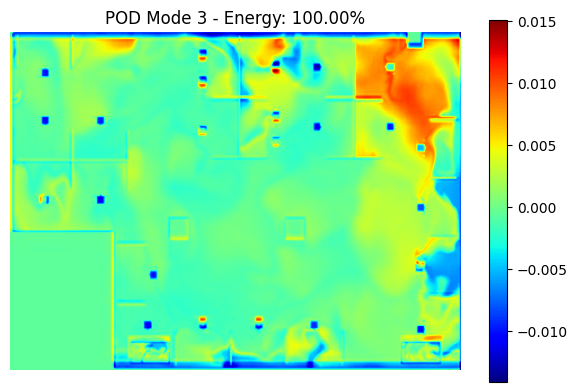

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# === Step 1: Define image filenames ===
image_files = [
    "t1.png", "t2.png", "t3.png", "t4.png", "t5.png",
    "t6.png", "t7 - Copy.png", "t7 - Copy - Copy.png",
    "t8.jpg", "t-10.png"
]

# === Step 2: Resize and convert images to grayscale ===
img_size = (300, 400)  # Height × Width (adjustable)
snapshots = []

for fname in image_files:
    img = Image.open(fname).convert('L').resize((img_size[1], img_size[0]))  # PIL resize uses (W, H)
    snapshots.append(np.array(img).flatten())

# === Step 3: Construct snapshot matrix ===
S = np.array(snapshots).T  # Shape: (pixels, time steps)

# === Step 4: Perform SVD ===
U, Sigma, VT = np.linalg.svd(S, full_matrices=False)

# === Step 5: Calculate POD energy capture ===
energy = np.cumsum(Sigma**2) / np.sum(Sigma**2)

# === Step 6: Plot the first 3 POD modes ===
for i in range(3):
    mode_img = U[:, i].reshape(img_size)
    plt.figure(figsize=(6, 4))
    plt.imshow(mode_img, cmap='jet')
    plt.title(f'POD Mode {i+1} - Energy: {energy[i]*100:.2f}%')
    plt.axis('off')
    plt.colorbar()
    plt.tight_layout()
    plt.show()


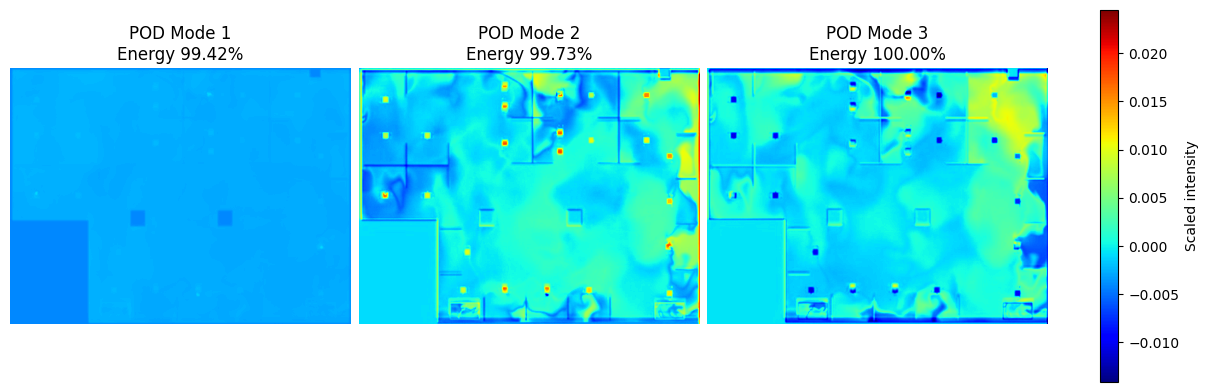

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# === Step 1: Define image filenames ===
image_files = [
    "t1.png", "t2.png", "t3.png", "t4.png", "t5.png",
    "t6.png", "t7 - Copy.png", "t7 - Copy - Copy.png",
    "t8.jpg", "t-10.png"
]

# === Step 2: Resize and convert images to grayscale ===
img_size = (300, 400)          # (height, width)
snapshots = []
for fname in image_files:
    img = Image.open(fname).convert("L").resize((img_size[1], img_size[0]))
    snapshots.append(np.array(img).flatten())

# === Step 3: Build snapshot matrix ===
S = np.array(snapshots).T      # shape = (pixels, time‑steps)

# === Step 4: Singular Value Decomposition ===
U, Sigma, VT = np.linalg.svd(S, full_matrices=False)

# === Step 5: Cumulative energy (optional) ===
energy = np.cumsum(Sigma**2) / np.sum(Sigma**2)

# === Step 6: Prepare the first 3 POD modes ===
modes = [U[:, i].reshape(img_size) for i in range(3)]

# ------ NEW PART: one guide‑bar (shared color bar) ------
# Find global vmin/vmax across the three mode images
vmin = min(mode.min() for mode in modes)
vmax = max(mode.max() for mode in modes)

# Plot the three modes in a single row with one shared color bar
fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
for i, ax in enumerate(axes):
    im = ax.imshow(modes[i], cmap="jet", vmin=vmin, vmax=vmax)
    ax.set_title(f"POD Mode {i+1}\nEnergy {energy[i]*100:.2f}%")
    ax.axis("off")

# Add one common color bar to the right of the subplots
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95, label="Scaled intensity")
plt.show()
